# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

*В данном проекте нам предстоит проанализировать архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за 2014-2019 год. В первую очередь необходимо обработать некорректные/аномальные значения в данных; по возможности заполнить недостающие значения. Выяснить: как быстро продавались квартиры; какие факторы больше всего влияют на общую (полную) стоимость объекта; как стоимость объектов зависит от расстояния до центра города.*

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.info()#оценим тип данных; количестов данных и пропусков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Мы видим, что всего в данных 23699 строк. Наименования столбцов корректны. В большинстве столбцов есть пропущенные значения. 
В столбцах: 
- first_day_exposition тип данных необходимо поменять на datetime, 
- is_apartment надо поменять тип данных на bool (столбе цпринимает значения только 0 и 1), 
- balcony, parks_around3000, ponds_around3000, days_exposition заменим на целочисленный тип (рациональные числа тут неуместны).

In [3]:
data.head(10)# посмотрим первые 10 строк таблицы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Видим кучу пропущенных строк в высоте потолков,  аппартаментах и числе водоёмов в радиусе 3 км

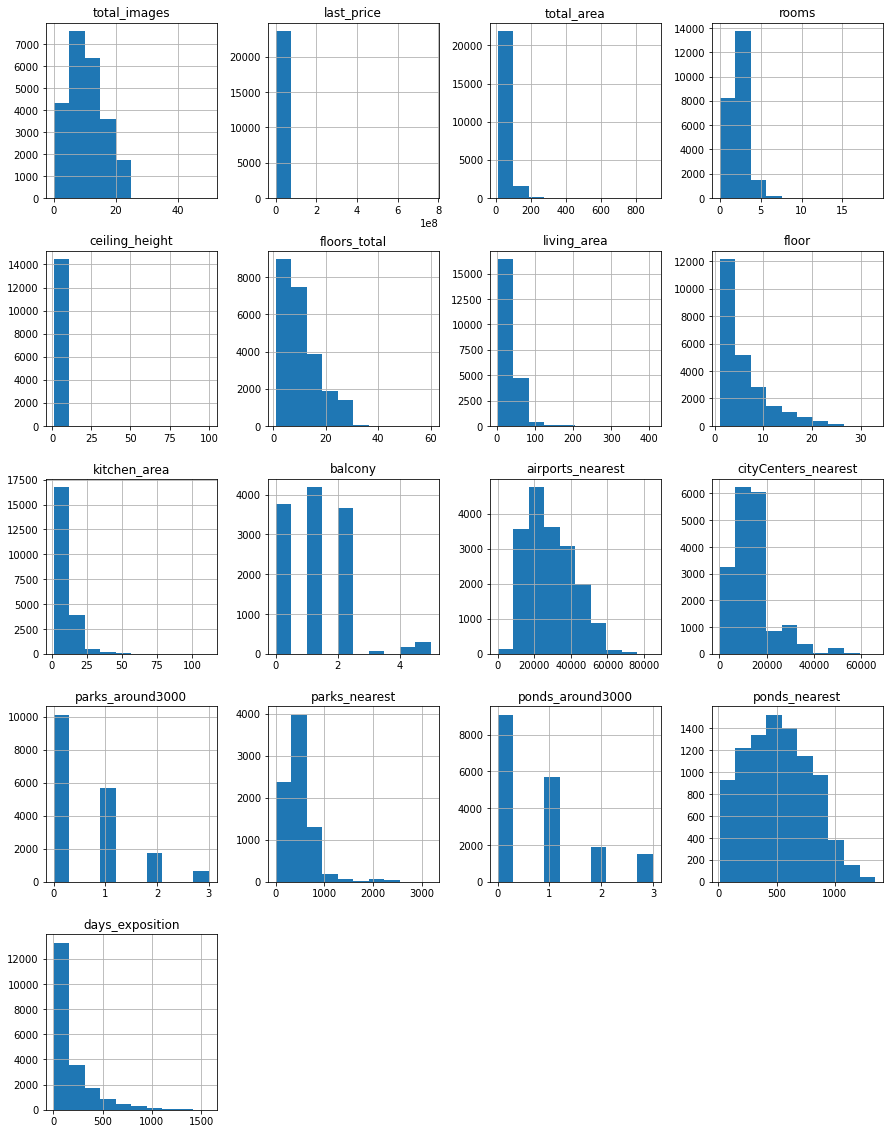

In [4]:
data.hist(figsize=(15,20));

Предварительно можно сказать следующее: чаще всего квартиры продавались до 150 дней, в радиусе до 20 км от центра и в домах до 10 этажей.

### Предобработка данных

In [5]:
print('Количество дубликатов:', data.duplicated().sum())#проверим на наличие дубликатов
print(data.isna().sum())# посмотрим на количество пропусков

Количество дубликатов: 0
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [6]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    (
        (df.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = True)
        .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
        .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
    );    

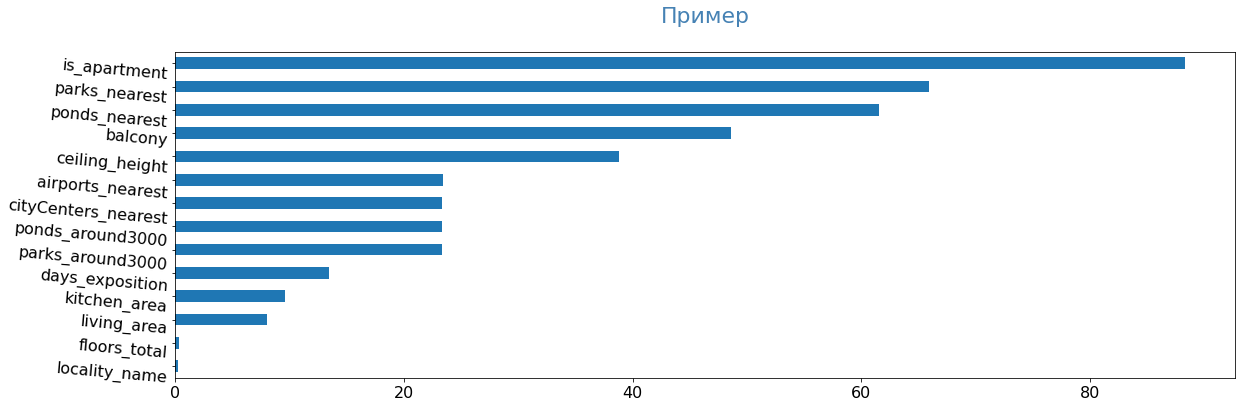

In [7]:
pass_value_barh(data)

In [8]:
#меняем формат столбца с датой в понятный для пандас формат даты и времени
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') 
#пропуски в столбце с балконами, скорее всего говорят о том, что балкона нет. Поэтому заменим пропуски значением 0 и поменяем тип данных на целое число. 
data['balcony'] = data['balcony'].fillna(0).astype('int')
#тоже самое проделаем с количеством парков и водоемов. Скоре всего их там просто нет.
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [9]:
#data['is_apartment'].value_counts()#посмотрим сколько апартаментов в нашем датафрэйме
# заменим пропущенные значения в этом столбце на False, так как в действительности аппартаменты встречаются редко.
data['is_apartment'] = data['is_apartment'].fillna(False).astype('bool')
data['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

In [10]:
#в столбцах floors_total и locality_name всего 86 и 49 пропущенных значений.Удаление этих строк не сильно повлияет на итог.
data.dropna(subset=['floors_total', 'locality_name'], inplace=True)
data['floors_total'] = data['floors_total'].astype('int')#переводим этажность в целочисленный тип
data.isna().sum()#еще раз взглянем, где остались пропуски

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

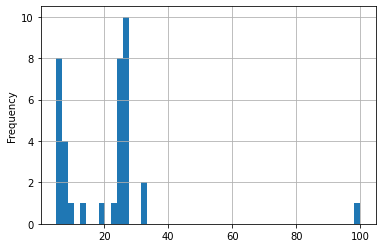

In [11]:
data['ceiling_height'].describe()
#средняя высота потолков 2,7 м не сильно отличается от медианы 2,65. Стандартное отклонение 1,2. Есть высота в 1 метр и 100м.
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist',grid=True ,bins=50, range= (5, 100))
#на диаграмме видно, что потолков от 20 до 40 м всего 21.Один потолок в 100м.От 5 до 20м- 15.
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height']/10 #разделим на 10 высоту потолков больше 20м


count    23565.000000
mean         2.696022
std          0.215921
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

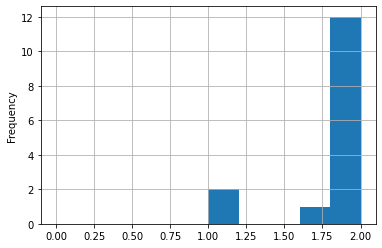

In [12]:
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist',grid=True ,bins=10, range= (0, 2))
#потолков до 2 м всего 15. Заменим их медианным значением, как и те, что больше 5 м- их тоже 15.
data.loc[(data['ceiling_height'] > 5) | (data['ceiling_height'] < 2) | (data['ceiling_height'].isna()), 'ceiling_height'] = data['ceiling_height'].median()
#сразу заменили и все пропущенные значения на медианное
data['ceiling_height'].describe()#отклонение стало минимальным. Все квартали имют разницу в пол метра

In [17]:
#избавимся от неявных дубликатов в названиях населенных пунктов
data['locality_name']  = data['locality_name'].str.replace('ё', 'е')
data['locality_name']  = data['locality_name'].str.replace('поселок городского типа', 'поселок')
data['locality_name']  = data['locality_name'].str.replace('городской поселок', 'поселок')
data['locality_name']  = data['locality_name'].replace('Мурино', 'поселок Мурино')
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'С

In [18]:
# check
data['locality_name'].nunique()

321

In [19]:
data.describe()# оценим значения по всем столбцам

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,21700.000000,23565.000000,21343.000000,23565.000000,18041.000000,18064.000000,23565.000000,8030.000000,23565.000000,9036.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.696022,10.675875,34.454822,5.878124,10.560994,0.593677,28797.082701,14192.656056,0.468831,490.580448,0.589900,518.289509,180.741395
std,5.681156,1.091093e+07,35.657060,1.078591,0.215921,6.594823,22.045359,4.871485,5.900630,0.960660,12632.499735,8613.348153,0.748403,341.572956,0.883966,278.009558,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,2.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26757.000000,13096.500000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,5.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [20]:
#посмотрим сколько квартир имеют 0 комнат
data.query('rooms == 0')# всего  194 записи с количеством комнат 0
data.query('rooms == 0 and studio == True')# из них 135 записей- это студии
#заменим все значение 0 на 1, ведь студия это и есть комната, а оставшиеся квартиры по площади соответствуют однушкам
data.loc[data['rooms'] == 0, 'rooms'] = 1
len(data.loc[data['rooms'] > 7])# смотрим количество строк с аномальным количеством комнат
data = data[(data['rooms'] <= 7)]# удалим строки, где количество комнат больше 7, их всего 31: сильно на анализ они не повлияют

In [21]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных показателях 
# в выбранных параметрах о продаже квартир


(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floor',
       'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,534.00","23,534.00","23,534.00","20,370.00","23,534.00","21,670.00","21,316.00","23,534.00","23,534.00"
min,1.00,12.00,2.00,1.00,"12,190.00",2.00,1.30,1.00,1.00
max,7.00,631.20,5.00,"1,580.00","763,000,000.00",347.50,107.00,33.00,60.00


In [22]:
data = data.query('last_price > 100000 and last_price < 7000000000')# отбрасываем аномальный ценовой диапозон
data = data.query('floors_total <= 30')# отбрасываем небоскрёбы
#len(data[data['total_area']>=400])
data = data.query('total_area < 400')# подгоняем площадь под реальную
#len(data[data['living_area']<7])
data = data.query('living_area >= 7')# убираем "комнатушки"
data['kitchen_area'] = abs(data['kitchen_area'])# выравниваем отрицательные площади

In [23]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floor',
       'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"21,614.00","21,614.00","21,614.00","18,654.00","21,614.00","21,614.00","20,827.00","21,614.00","21,614.00"
min,1.00,12.00,2.00,1.00,"430,000.00",8.00,1.30,1.00,1.00
max,7.00,380.00,4.90,"1,580.00","330,000,000.00",255.70,107.00,27.00,29.00


In [24]:
#len(data[data['kitchen_area']<2])
data = data.query('kitchen_area >= 2')# напоследок отбросим кухни до 2 метров- их немного.

Оставшиеся данные кажутся более-менее правдоподобными. По крайней мере поддаются логическому объяснению.

### Посчитайте и добавьте в таблицу новые столбцы

In [25]:
# Добавляем столбец со стоимостью квадратного метра (price_metr) и приводим его в целочисленный тип
data['price_metr'] = data['last_price'] / data['total_area']
data['price_metr'] = data['price_metr'].astype(int)

# Добавляем столбцы дня недели, месяца и года
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

# Создаём функцию для заполнения нового столбца с типом этажа
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_group, axis=1)
#переводим расстояние до центра города в км и отбрасываем дробную часть
data['cityCenters_km'] = data['cityCenters_nearest']/1000
data['cityCenters_km'] = round(data['cityCenters_km'])
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_metr,weekday,month,year,floor_type,cityCenters_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,482.0,2,755.0,NaN,120370,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,NaN,0,NaN,81.0,82920,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,90.0,2,574.0,558.0,92785,3,8,2015,другой,14.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,112.0,1,48.0,121.0,100000,1,6,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,NaN,0,NaN,55.0,95065,0,9,2018,другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,NaN,0,NaN,155.0,99195,3,11,2017,другой,19.0
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,NaN,0,NaN,189.0,87454,2,5,2018,другой,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,NaN,0,NaN,289.0,88524,6,2,2017,другой,15.0
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.30,3,False,...,310.0,2,553.0,137.0,127525,3,11,2017,другой,14.0
11,9,3300000.0,44.00,2018-08-27,2,2.65,5,31.00,4,False,...,NaN,0,NaN,7.0,75000,0,8,2018,другой,52.0


### Проведите исследовательский анализ данных

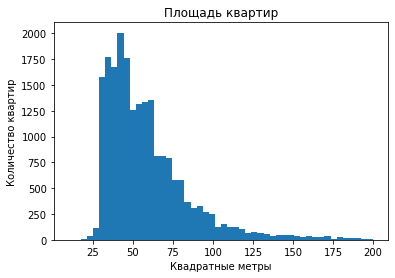

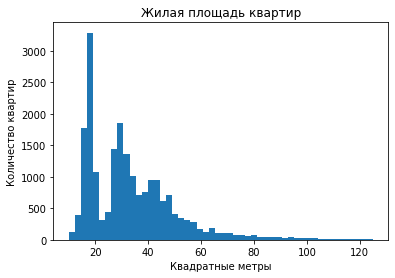

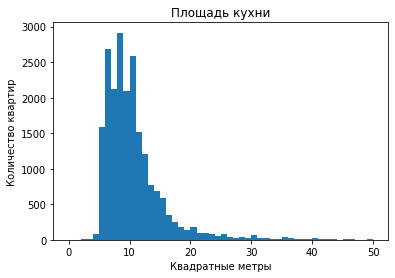

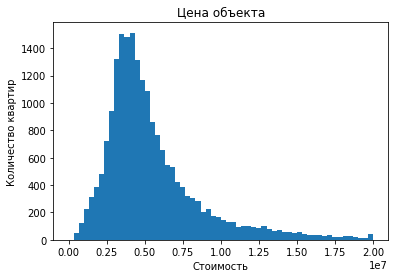

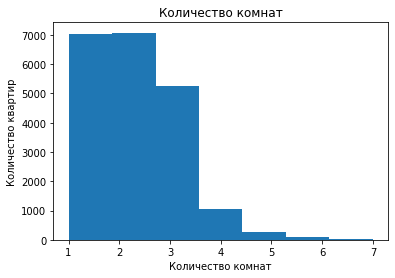

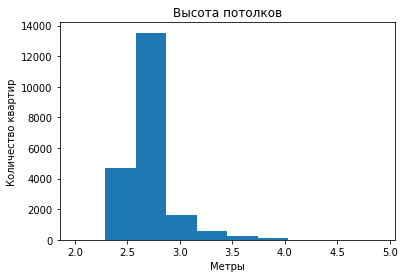

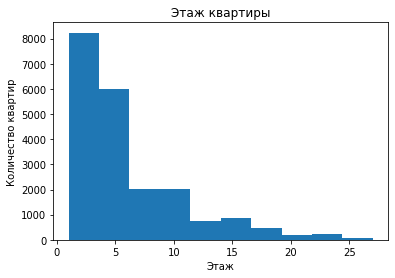

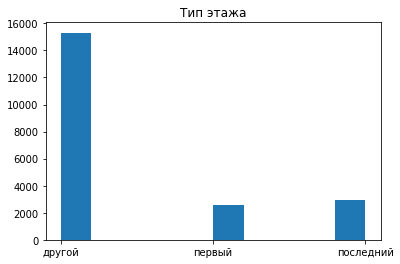

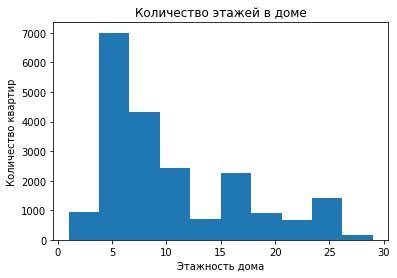

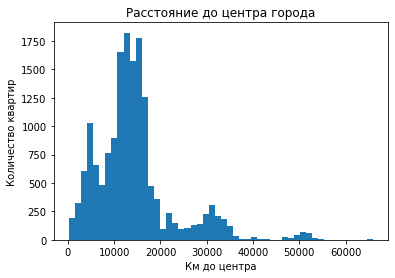

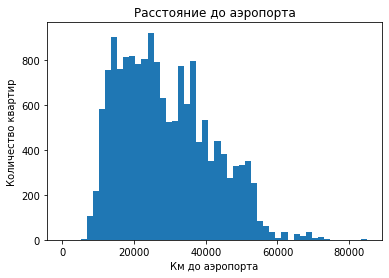

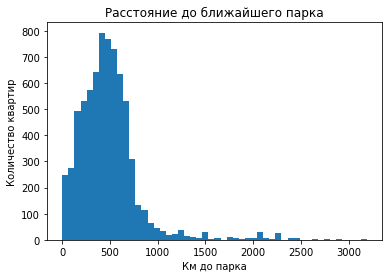

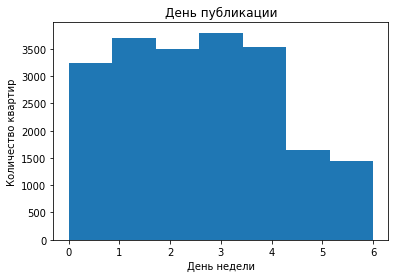

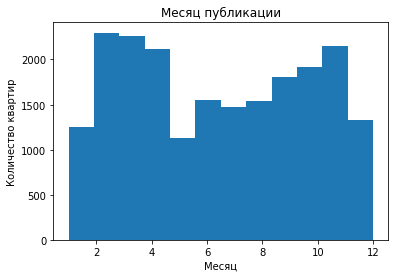

In [26]:
plt.hist(data['total_area'], bins=50, range=(10,200))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
plt.hist(data['living_area'], bins=50, range=(10,125))
plt.title('Жилая площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
plt.hist(data['kitchen_area'], bins=50, range=(0,50))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
plt.hist(data['last_price'], bins=60, range=(0,20000000))
plt.title('Цена объекта')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
plt.hist(data['rooms'], bins=7, range=(1,7))
plt.title('Количество комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
plt.hist(data['ceiling_height'], bins=10)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
plt.hist(data['floor'], bins=10)
plt.title('Этаж квартиры')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()
plt.hist(data['floor_type'])
plt.title('Тип этажа')
plt.show()
plt.hist(data['floors_total'], bins=10)
plt.title('Количество этажей в доме')
plt.xlabel('Этажность дома')
plt.ylabel('Количество квартир')
plt.show()
plt.hist(data['cityCenters_nearest'], bins=50)
plt.title('Расстояние до центра города')
plt.xlabel('Км до центра')
plt.ylabel('Количество квартир')
plt.show()
plt.hist(data['airports_nearest'], bins=50)
plt.title('Расстояние до аэропорта')
plt.xlabel('Км до аэропорта')
plt.ylabel('Количество квартир')
plt.show()
plt.hist(data['parks_nearest'], bins=50)
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Км до парка')
plt.ylabel('Количество квартир')
plt.show()
plt.hist(data['weekday'], bins=7)
plt.title('День публикации')
plt.xlabel('День недели')
plt.ylabel('Количество квартир')
plt.show()
plt.hist(data['month'], bins=12)
plt.title('Месяц публикации')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')
plt.show()

- Преимущественно **площадь продаваемых квартир** от 30 до 60 кв.м
- **Жилая площадь** имеет два пика в 20 и 30 м
- **Площадь кухонь** преимущественно от 5  до 15м
- Преобладает **цена** в диапозоне от 2,5 млн до 7 млн
- В основном квартиры состоят из 1, 2 и 3 **комнат**. Есть небольшая доля 4-комнатных квартир. Варианты, где больше 7 комнат больше похожи на выбросы.
- Большинство вариантов имеют **высоту потолков** от 2,5 до 3 метров.
- **Этаж квартиры.** Львиная доля продаваемых квартир находится в диапозоне от 1 до 5 этажа.
- **Тип этажа.** Квартир на первом и последнем этаже приблизительно одинаково, около 2500. Но, всё же бОльшая часть квартир находяися не на первом и последнем этажах.
- **Этажность домов** имеет обратно пропорциональную зависимость: чем высотнее здание, тем меньше квартир на продажу в них встречается. Преимущественно квартиры сосредоточены в 5этажных домах.
- Основная масса квартир сосредочена в радиусе  5-20 км **от центра города**
- Пик продаваемых квартир приходится на 20 км **от аэропорта**
- **Парки** в основной массе находятся в пешей доступности до 1 км.
- **День недели.** Объявления в будние дни подаются почти в 2 раза чаще, чем в выходные.
- **Месяц.** Пик поданых объявлений приходится на февраль, март, апрель, ноябрь. В мае было подано объявлений в два раза меньше чем в пиковые месяца.

**Изучим, как быстро продавались квартиры.**
*Изначально, от пропущенных значений в этом столбце я не избавлялась, так как предположила, что квартиры на момент выгрузки данных еще находились на продаже.*

Время продажи (медиана): 102
Время продажи (среднее): 185


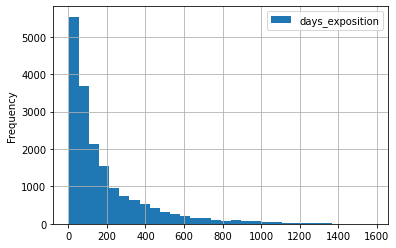

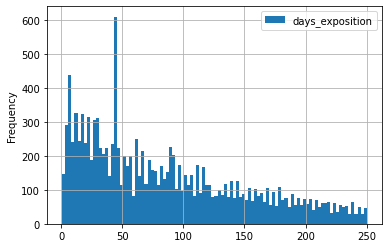

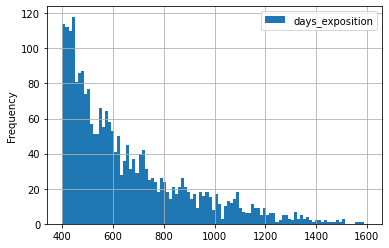

In [49]:
print('Время продажи (медиана):', round(data['days_exposition'].median()))
print('Время продажи (среднее):', round(data['days_exposition'].mean()))
data['days_exposition'].describe()# видим огромный размах по количеству дней, и большое стандартное отклонение
data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True)# посмотрим на гистограмму по всем значениям
filtered = data.query('days_exposition != 45 and days_exposition != 60 and days_exposition != 90')
filtered.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,250))#поближе посмотрим на продажи до 250 дней
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (400,1600));#поближе взглянем на долгие продажи

**Вывод:** Медианное время продажи - 95 дней. Среднее время продажи - 181 день.
Более половины всех квартир продаются за срок в 100 дней. На гистограмме популярных значений мы видим сразу 3 пиковых значения: около 45, 60 и 90 дней. С чем это может быть связано- не совсем понятно.
Быстрой продажей можно назвать срок в 45 дней и меньше. Долгой продажей - от 400 дней (более года) и дольше.
<br />
**Посмотрев условия размещения объявлений, стало понятно, что пиковые значения в 45, 60 и 90 дней образовались из-за того, что объявления автоматически снимались, согласно условиям размещения объявления. Значит эти значения при анализе данных не стоит брать во внимание**

**Какие факторы больше всего влияют на общую (полную) стоимость объекта?**

Корреляция цены и площади: 0.6762346020472532


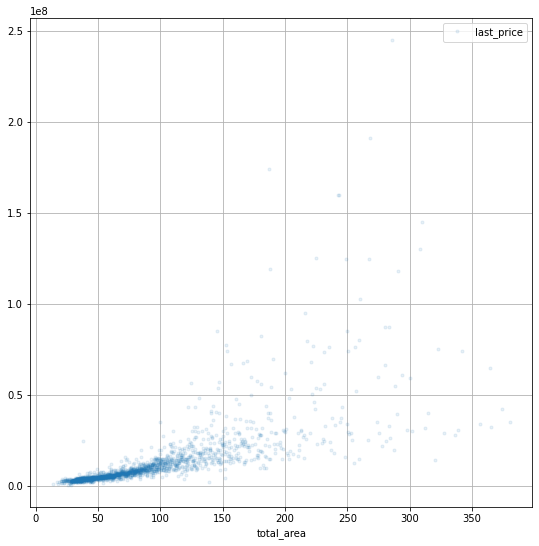

In [28]:
# Зависимость цены от площади
data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(9, 9),alpha = 0.1,markersize=3)
print('Корреляция цены и площади:', data['total_area'].corr(data['last_price']))

**Итог:** Зависимость цены от площади квартиры прослеживается по площиди до 100 кв.м(там есть единичные выбросы). По графику мы видим, что разброс цен начинается после площади 100 кв.м.

Корреляция цены и жилой площади: 0.5937893691371932


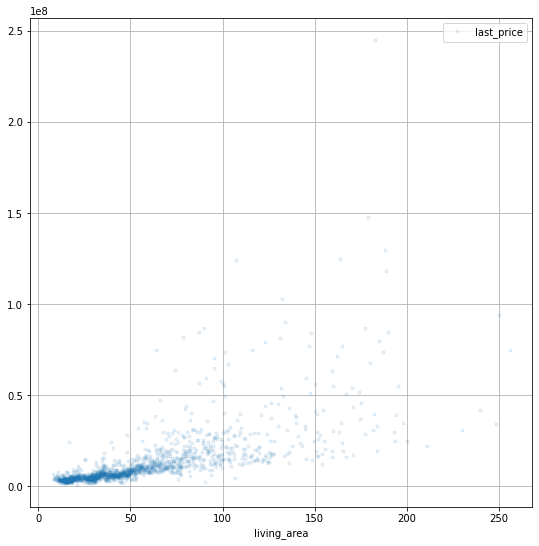

In [29]:
# Зависимость цены от жилой площади
data.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(9, 9),alpha = 0.1, markersize=3)
print('Корреляция цены и жилой площади:', data['living_area'].corr(data['last_price']))

**Итог:** Зависимость цены от жилой площади еще меньше, чем в предыдущих наболюдениях. Сильно ничего не поменялось.

Корреляция цены и площади кухни: 0.5253630108096319


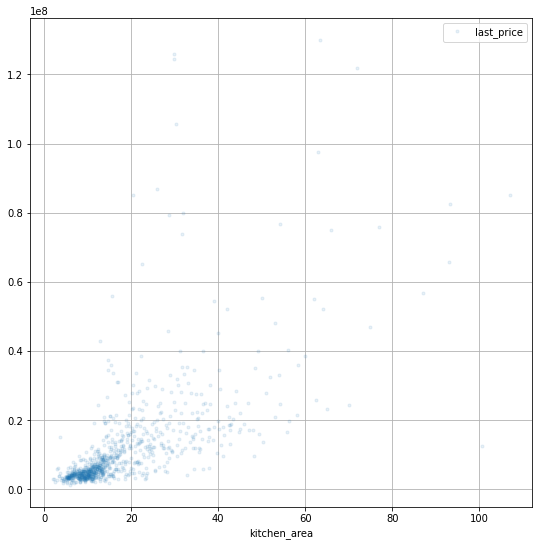

In [30]:
# Зависимость цены от площади кухни
data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(9, 9),alpha = 0.1,markersize=3)
print('Корреляция цены и площади кухни:', data['kitchen_area'].corr(data['last_price']))

**Итог:** Зависимость цены от площади стала еще меньше- 0,5. Я считаю, что эти два параметра вообще не могут быть взаимосвязаны. И поиск зависимоти между ними- это полный абсурд. Это можно сравнить с поиском корреляциии цены квартиры от высоты потолка- такой же абсурд.

Корреляция цены и количества комнат: 0.3920154537251869


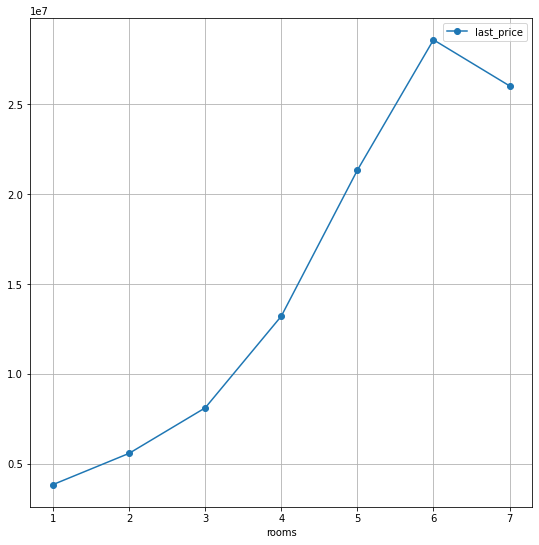

In [31]:
# Зависимость цены от количества комнат
data.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(9, 9))
print('Корреляция цены и количества комнат:', data['rooms'].corr(data['last_price']))


**Итог:** Странно, что корреляция такая маленькая между этими двумя величинами. Ведь очевидно что комнатность квартиры напрямую влиет на цену. Если мы посмотрим на график, то можем заметить: цена у 1-,2- и 3-комнатных квартир, действительно не сильно отличается. А вот от 4-х комнат и далее график стремительно летит вверх. Т.е. после 4 комнат прослеживается зависимость намного сильнее.

<AxesSubplot:xlabel='floor_type'>

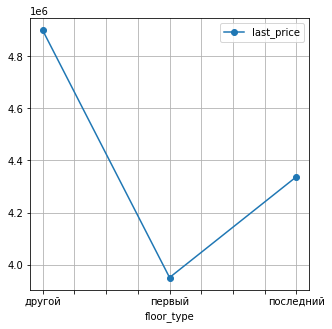

In [32]:
# Зависимость цены от этажа
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5))


**Итог:** Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.

<AxesSubplot:xlabel='year'>

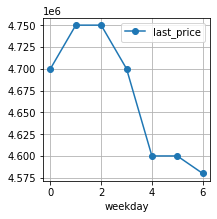

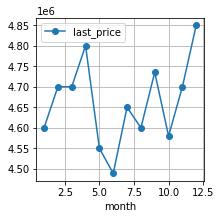

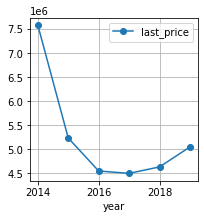

In [33]:
# Зависимость цены от дня недели
data.pivot_table(index='weekday', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(3, 3))
# Зависимость цены от месяца размещения объявления
data.pivot_table(index='month', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(3, 3))
# Зависимость цены от года размещения объявления
data.pivot_table(index='year', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(3, 3))

**Итог:** 
- Из графиков можно увидеть, что самые дорогие квартиры выствлялись на продажу во вторник и среду, с каждым следующим днём средняя цена квартиры снижалась. И, наконец, в воскресенье выставлялись самые дешевые квартиры.
- Если смотреть на цену квартиры по месяцу выставления на продажу, то мы увидим, что в апреле квартиры выставлялись дороже всего, а в июне наоборот- самые дешевые. На рынке недвижимости, как и во многих других сферах присутствует сезонность - в начале лета мы видим наименьшее предложение как по количеству, так и по стоимости недвижимости. Возможно, это связано с отпусками.
- Цена квартир с 2014 по 2016 года сильно "провалилась" вниз. с 2016 по 2018 год цена квартир была стабильна, а после 2018 медленно стала рости, в среднем на 500т.р.

**Средняя цена одного квадратного метра в топ-10 населённых пунктах**

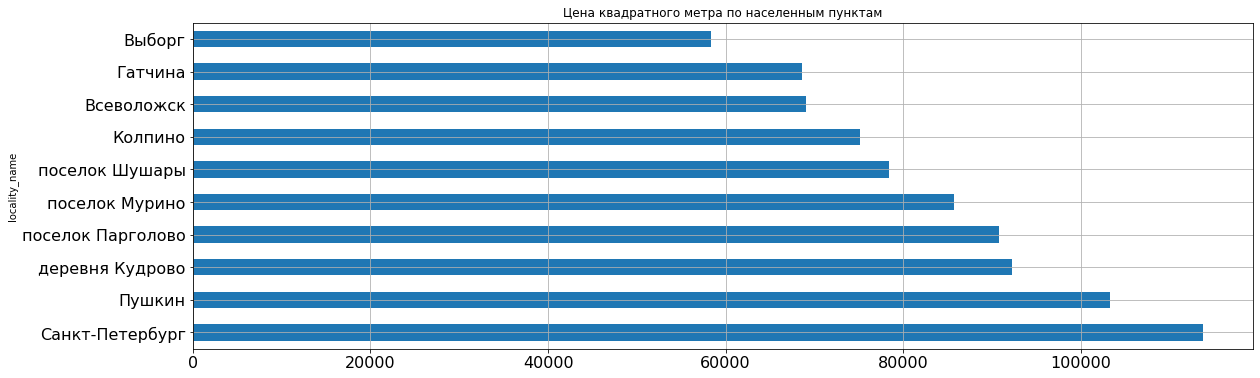

In [46]:
#Создадим новую переменную с 10 городами по количеству объявлений
top_ten_city = data['locality_name'].value_counts().head(10)
#создаем сводную таблицу со средним значением квадратного метра для каждого населенного пункта из топ-10

city_price_metr = data.query('locality_name in (@top_ten_city.index)')\
.pivot_table(index='locality_name', values='price_metr' )

#переводим столбец в целочисленный тип
city_price_metr = city_price_metr.astype(int)
(
    city_price_metr.sort_values('price_metr', ascending=False)
    .plot(kind= 'barh', figsize=(19,6), legend = False, fontsize = 16, grid=True)
)
plt.title('Цена квадратного метра по населенным пунктам');

**Вывод:**
Наибольшая средняя стоимость квадратного метра, как и ожидалось, в Санкт-Петербурге. Из топ-10 наименьшая стоимость квадратного метра в Выборге.

**Средняя цена каждого километра от центра**

<AxesSubplot:xlabel='cityCenters_km'>

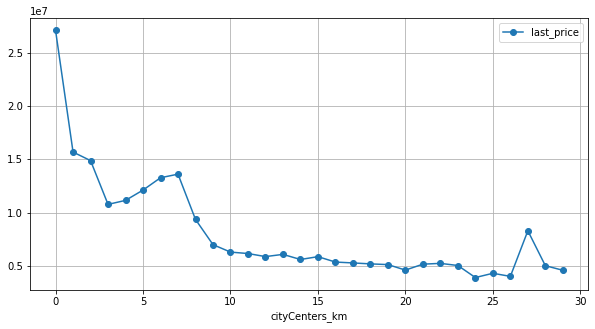

In [35]:
# Выбираем Санкт-Петербург; смотрим график, где указана средняя стоимость для каждого км
(
    data.query('locality_name == "Санкт-Петербург" and last_price < 100000000')
    .pivot_table(index='cityCenters_km', values='last_price')
    .plot(grid=True, style='o-', figsize=(10, 5))
)

**Вывод:** квартиры, находящиеся в центре резко отличаются в цене от тех, которые находятся на расстоянии всего 1 км от центра.
Цена квартир в 1-2 км от центра практически одинакова. Далее мы видим так же тенденцию к снижению стоимости по удаленности от центра. С 3 до 7 км от центра мы видим обратную зависимость- цена растет, но не значительными темпами.Начиная с 7км от центра  цена стремится вниз, в зависимости от удаленности. с 12 по 23ый км цена варьируется в одном диапозоне. Непонятный пик приходится на 27ом км: предполагаю, это выброс повлиял на этот пик.

### Общий вывод

**Обработка** Мы получили на входе датафрэйм из 23699 строк. В результате обработки у нас осталось 23534 строк. Я постаралась максимально сохранить полученные данные, что бы в анализ вошло как можно больше достоверной информации. Ведь при исследовательском анализе данных и построении графиков мы всегда можем отбросить аномальные значения срезом данных. Мы обработали пропущенные значения там, где это необходимо, заменили типы данных на необходимые для удобной работы. 
**Посчитали и добавили в таблицу** цену квадратного метра жилья, вывели из даты дни недели, месяцы и года размещения объявлений, добавили категории по этажам квартир для дальнейшего анализа. 
**Изучая время продажи квартир** мы выявили, что большая часть квартир продается до 100 дней. но так же много встречается квартир, которые продаются до 400 дней, поэтому срок продажи квартиры до 400 дней можно считать нормальным.
**Стоимость квартиры** больше всего зависит от общей площади, этажа квартиры и конечно же года продажи. 
**Зависимость цены от расположения квартиры** прослеживается, и это очевидно: во всех крупных городах квартиры, находящиеся ближе к центру стоят дороже. Эта зависимость прослеживается на расстоянии до 12 км от центра, далее удаленность не особо сказывается на цене.


In [36]:
# check
import seaborn as sns

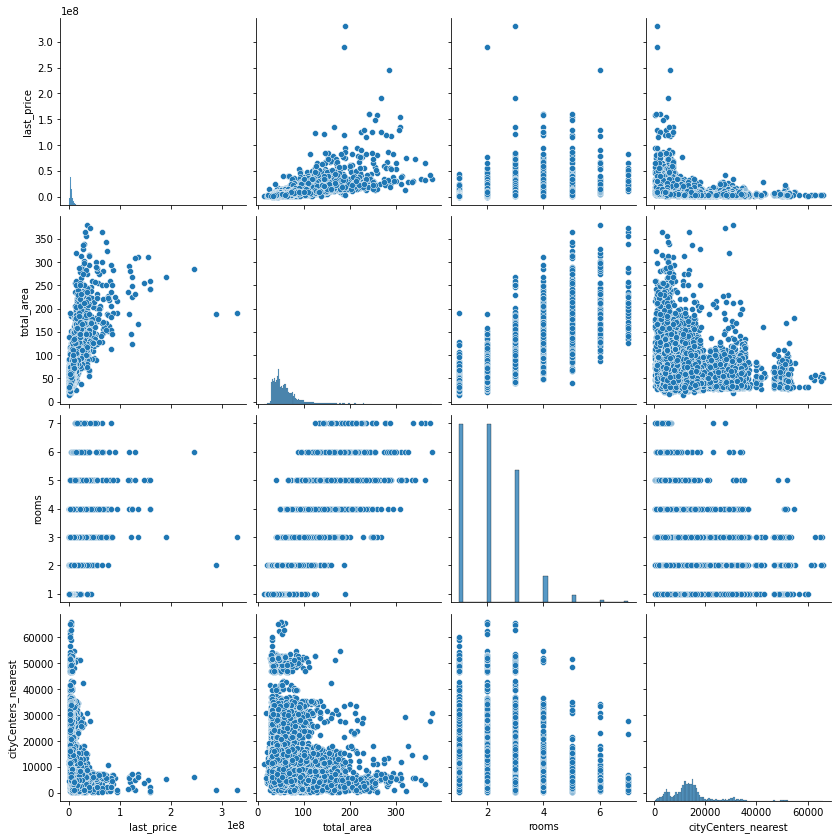

In [37]:
# check
sns.pairplot(data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']])
plt.gcf().set_size_inches(12,12);


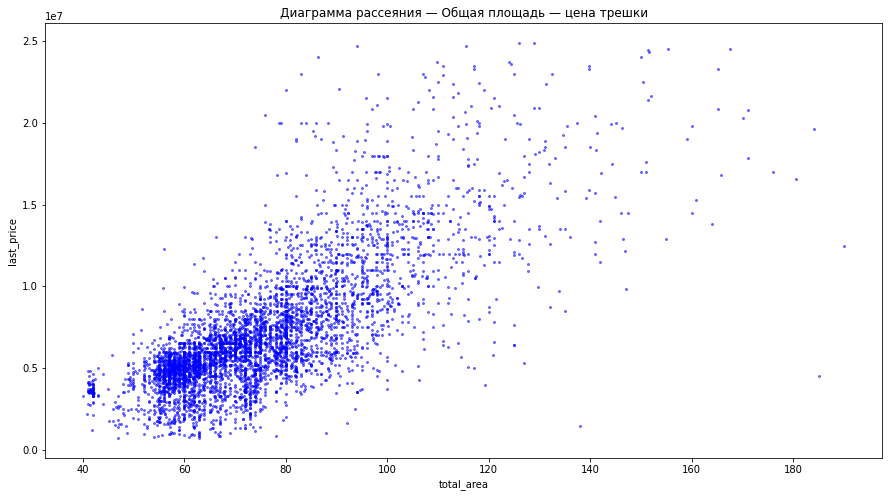

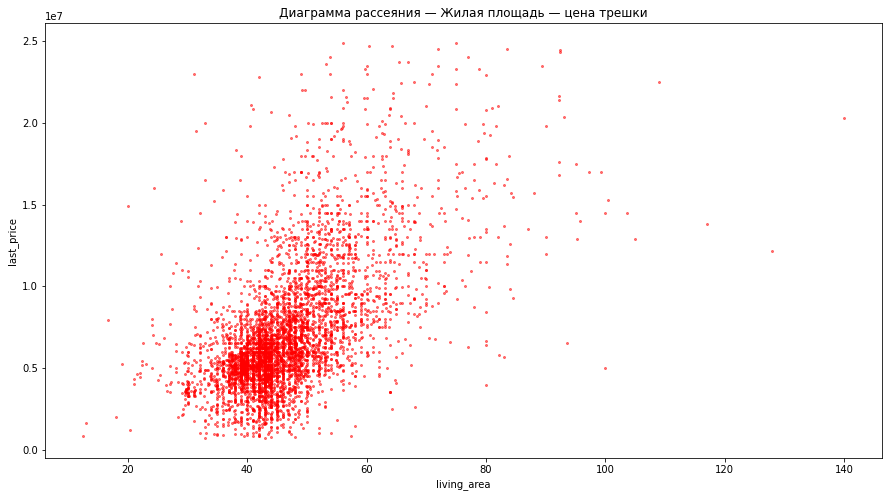

In [38]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='last_price' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — цена трешки')


data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter', 
        y='last_price' , x='living_area', alpha=0.5, figsize=(15,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Жилая площадь — цена трешки');